# Random Forest Classification

Random forest is a supervised learning algorithm. The "forest" it builds, is an ensemble of decision trees, usually trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result. Random forest can be used for both classification and regression problems

# Problem:
Conversion Rate is calculated based on EmailSent, Open Rate, Click Rate

In [1]:
pwd

'C:\\Users\\User\\Git-Hup Files\\Machine Learning Classification'

In [2]:
cd C:\Users\User\Desktop\Anindita Mitra\Machine Learning\Email Marketing

C:\Users\User\Desktop\Anindita Mitra\Machine Learning\Email Marketing


In [4]:
#Import all the library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# import Data set from the local directory
df = pd.read_csv("EmailClassification.csv")

In [6]:
df.head(10)

,Email_ID,Month,Email_Sent,Open_Rate,Click_Rate,Conversion_Rate
0,EMA00081000168000,Jan,873,42,14,0
1,EMA00081000187610,Feb,630,32,26,1
2,EMA00081000244770,Mar,988,21,8,0
3,EMA00081000245260,Apr,339,25,9,0
4,EMA00081000264690,May,1157,30,31,1
5,EMA00081000337110,Jun,1157,25,31,1
6,EMA00081000390580,Jul,962,78,27,0
7,EMA00081000445960,Jan,578,17,11,0
8,EMA00081000581770,Feb,1173,33,21,1
9,EMA00081000587870,Mar,1173,23,2,0


In [7]:
#defining X and Y
x = df.iloc[:,2:-1]
y= df.iloc[:, -1]

In [8]:
x.head(10)

,Email_Sent,Open_Rate,Click_Rate
0,873,42,14
1,630,32,26
2,988,21,8
3,339,25,9
4,1157,30,31
5,1157,25,31
6,962,78,27
7,578,17,11
8,1173,33,21
9,1173,23,2


In [9]:
# Splitting data into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x , y, test_size=0.2, random_state=0)

In [11]:
# Training Dec Tree
from sklearn.ensemble import RandomForestClassifier
Classifier = RandomForestClassifier(n_estimators = 10, criterion='entropy',random_state = 0)
Classifier.fit(x, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [12]:
#prediction on random sample
Classifier.predict([[1579,823,456]])

array([0], dtype=int64)

In [13]:
y_pred = Classifier.predict(x_test)

In [16]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score

[[30  0]
 [ 1  9]]


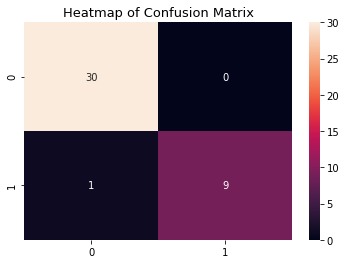

In [17]:

cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.title('Heatmap of Confusion Matrix', fontsize=13)
sns.heatmap(cm, annot=True)
plt.show()


In [18]:
#Prediction and Evaluation
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.90      0.95        10

    accuracy                           0.97        40
   macro avg       0.98      0.95      0.97        40
weighted avg       0.98      0.97      0.97        40



In [19]:
#Accuracy
accuracy_score(y_test, y_pred) 

0.975

In [20]:
#Cross-Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = Classifier, X = x_train, y = y_train, cv = 10)
print("accuracies: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

accuracies: 88.08 %
Standard Deviation: 6.49 %
